In [12]:
import import_ipynb
%run Utils.ipynb
%run Models.ipynb


In [13]:
start_time = datetime.now()
print("Code running started at:", start_time.strftime("%Y-%m-%d %H:%M:%S"))
print_environment_info()

Code running started at: 2024-11-09 19:15:51
---------------------------------------
Python Version: 3.9.19 | packaged by conda-forge | (main, Mar 20 2024, 12:38:46) [MSC v.1929 64 bit (AMD64)]
Python Executable: c:\Users\Monet\anaconda3\envs\bone-age\python.exe
Operating System: Windows 10
Platform: Windows-10-10.0.19045-SP0
Architecture: ('64bit', 'WindowsPE')
NumPy Version: 1.26.4
Pandas Version: 2.2.1
TensorFlow Version: 2.7.0
imblearn Version: 0.12.3
Matplotlib Version: 3.8.3
Current Working Directory: c:\Users\Monet\Desktop\EcoCurrentNet
Installed Packages:

Hardware Information:

Software Versions:
scikit-learn Version: 1.5.2
scipy Version: 1.13.0
Pillow Version: 10.3.0
jupyter is not installed.
seaborn Version: 0.13.2
keras Version: 2.7.0
matplotlib Version: 3.8.3
numpy Version: 1.26.4
tensorflow Version: 2.7.0
imblearn is not installed.
statsmodels is not installed.
xgboost Version: 2.1.2
lightgbm Version: 4.5.0
catboost Version: 1.2.7
optuna is not installed.
tensorflow_addon

In [14]:
data_generator = OptoelectronicDataGenerator(n_samples=1000)
X_train, X_val, y_train, y_val, X, y = data_generator.preprocess_data()


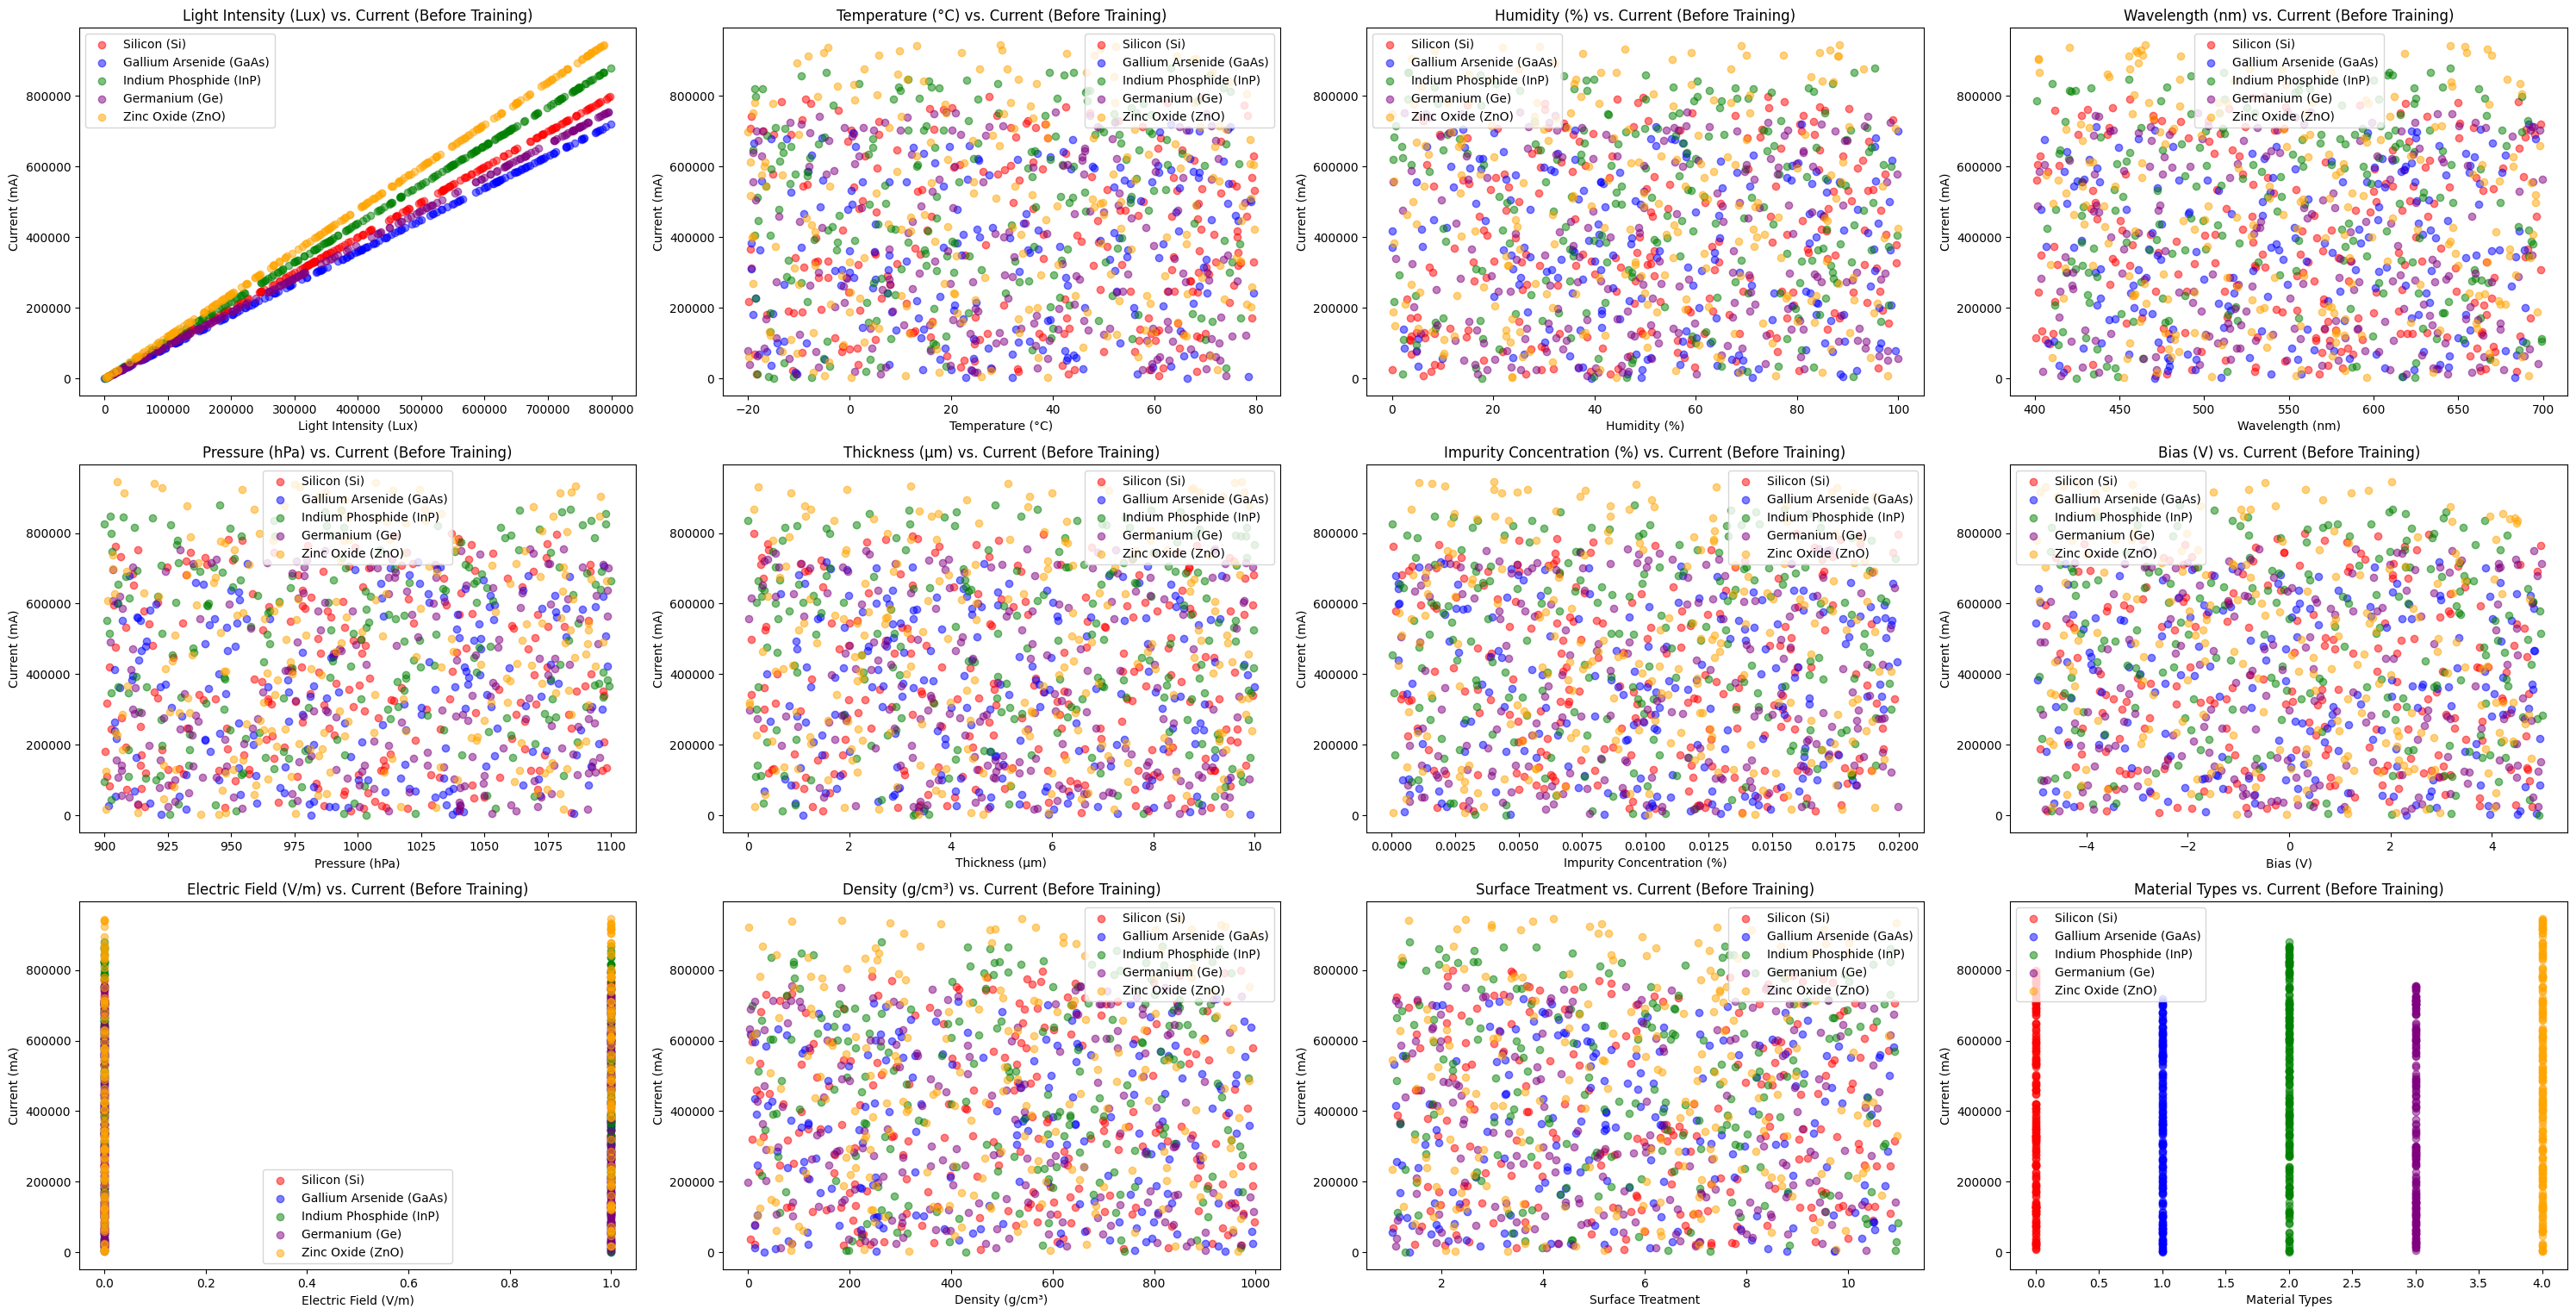

In [15]:
plot_material_properties_before_training(X, y, data_generator.material_properties)

c:\Users\Monet\anaconda3\envs\bone-age\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.




CatBoost Metrics (CatBoost):
Root Mean Square Error: 15956.460510
Mean Squared Error: 254608631.999874
Mean Absolute Error: 12256.739859
R² Score: 0.995539
----------



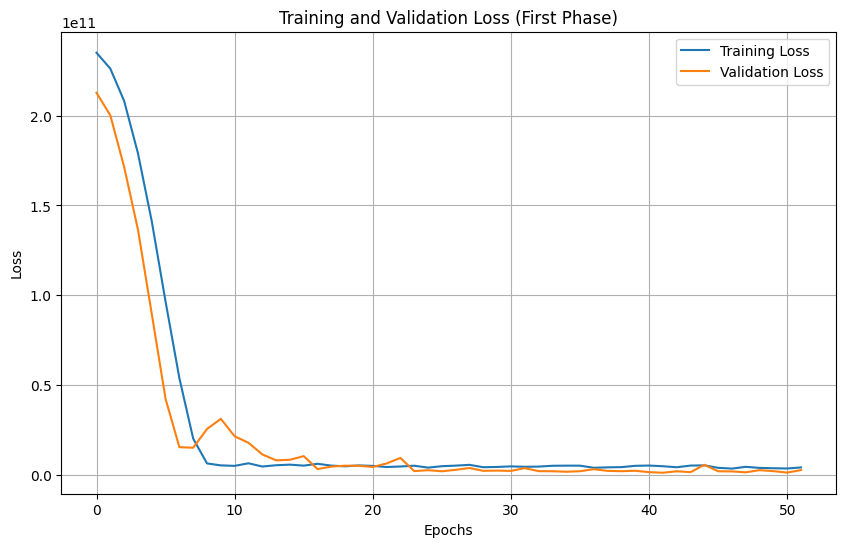

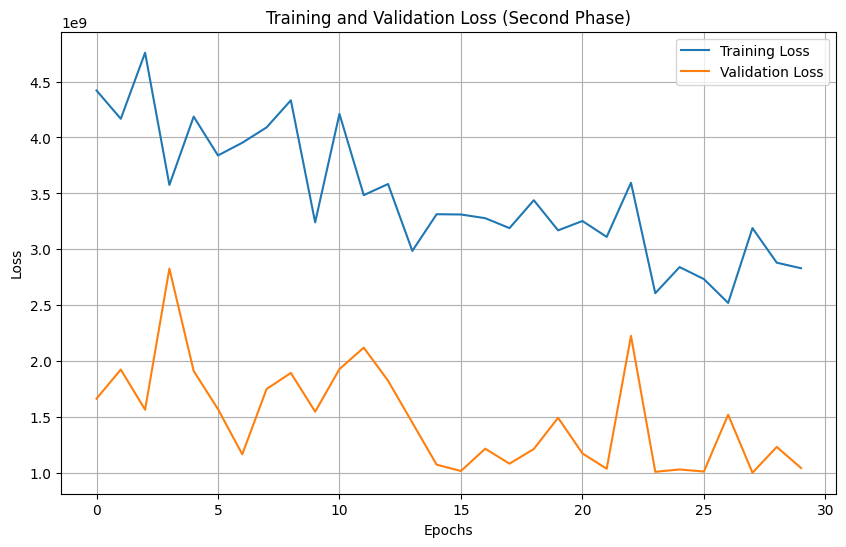

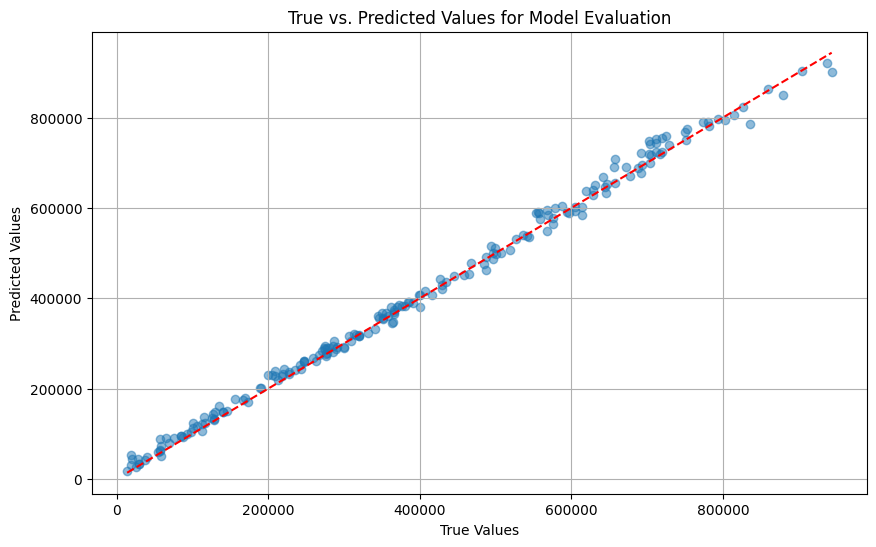

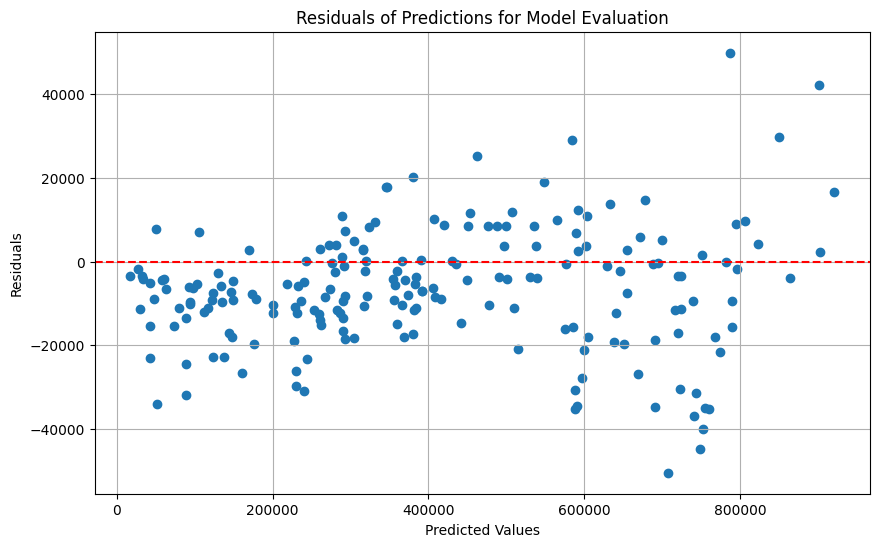

In [16]:
rmse, mse, mae, r2, (best_epoch_first, best_val_loss_first), (best_epoch_second, best_val_loss_second), y_pred_catboost, X_val = train(
    EcoCurrentNet,
    X_train,
    y_train,
    X_val,
    y_val
)

In [17]:
# Print model summary
model, catboost = EcoCurrentNet(X_train.shape[1])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 12, 1)]      0           []                               
                                                                                                  
 conv1d_21 (Conv1D)             (None, 12, 64)       256         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_21 (BatchN  (None, 12, 64)      256         ['conv1d_21[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 leaky_re_lu_15 (LeakyReLU)     (None, 12, 64)       0           ['batch_normalization_21[0]

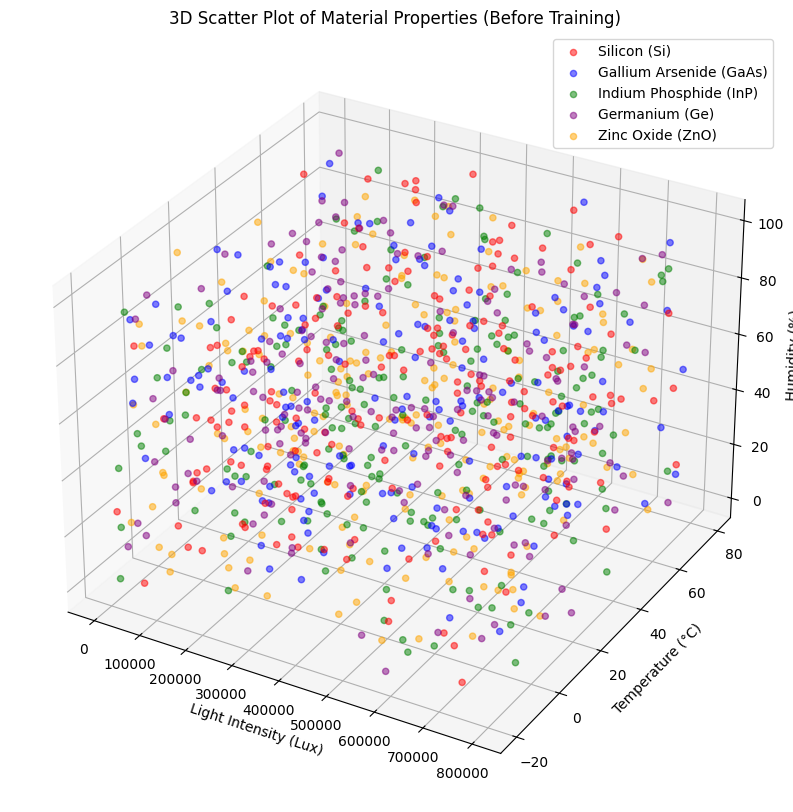

In [18]:
plot_material_properties(X, y, data_generator.material_properties)

In [19]:
plot_current_in_3D(X, y, data_generator.material_properties)

In [27]:
import import_ipynb
%run Utils.ipynb
%run Models.ipynb

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data_generator = OptoelectronicDataGenerator(n_samples=1000)
X_train, X_val, y_train, y_val, X, y = data_generator.preprocess_data()

scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_val = y_scaler.transform(y_val.reshape(-1, 1))

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Support Vector Regression': SVR(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Bagging Regressor': BaggingRegressor()
}

param_grids = {
    'Support Vector Regression': {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]},
    'KNeighbors Regressor': {'n_neighbors': [3, 5, 7]},
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]},
    'Decision Tree': {'max_depth': [5, 10, 15]},
    'Bagging Regressor': {'n_estimators': [50, 100, 150]}
}

results = []

for model_name, model in models.items():
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=3, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    results.append({
        'Model': model_name,
        'R²': r2,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse
    })

results_df = pd.DataFrame(results)
sorted_results_df = results_df.sort_values(by='R²', ascending=False)
sorted_results_df.set_index('Model', inplace=True)

print(sorted_results_df)


c:\Users\Monet\anaconda3\envs\bone-age\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\Monet\anaconda3\envs\bone-age\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\Monet\anaconda3\envs\bone-age\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\Monet\anaconda3\envs\bone-age\lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Monet\an

                                 R²       MSE       MAE      RMSE
Model                                                            
Decision Tree              0.991654  0.008695  0.055151  0.093246
Bagging Regressor          0.989752  0.010675  0.070119  0.103321
Random Forest              0.988950  0.011511  0.073257  0.107290
Linear Regression          0.971932  0.029239  0.144503  0.170996
Bayesian Ridge             0.971919  0.029253  0.144556  0.171035
Ridge Regression           0.971897  0.029276  0.144641  0.171103
Support Vector Regression  0.940394  0.062094  0.192912  0.249186
KNeighbors Regressor       0.761427  0.248530  0.399504  0.498528
Lasso Regression          -0.003925  1.045827  0.878216  1.022657


In [50]:
end_time = datetime.now()
print("Code running ended at:", end_time.strftime("%Y-%m-%d %H:%M:%S"))
print("---------------------------------------")

execution_time = end_time - start_time
print("Total execution time:", execution_time)

Code running ended at: 2024-10-29 12:51:49
---------------------------------------
Total execution time: 0:00:18.898708
